In [1]:
import os
import csv
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
import sklearn
from sklearn.metrics import roc_curve, auc 
from sklearn.model_selection import StratifiedKFold

from skimage import data,exposure

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint

In [3]:
import tensorflow as tf
print (tf.__version__)
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

2.3.0
Default GPU Device: /device:GPU:0


In [4]:
tf.__version__

'2.3.0'

In [5]:
tf.debugging.set_log_device_placement(True)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9358124706287458624
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 74624500574551493
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 592323826444610689
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:1"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5842199356103498324
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 66715648
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 13117768184719807297
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:02:00.0, compute capability: 6.1"
, name: "/device:GPU:1"
device_type: "GPU"
memory_

In [6]:
tf.test.is_built_with_cuda()

True

In [28]:
tf.test.is_gpu_available('/device:GPU:1')

True

In [34]:
os.environ["CUDA_VISIBLE_DEVICES"]

'3'

In [39]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" 
tf.test.gpu_device_name()

'/device:GPU:0'

In [40]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('XLA_GPU')))

Num GPUs Available:  2


In [41]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:1', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [ ]:
c = []
i = 1
tf.debugging.set_log_device_placement(True)
with tf.device('device:CPU:1'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c.append(tf.matmul(a, b))

print(c)

In [2]:
# cv => train:val:test = 4:1:1
# open csv
traincsv = open('/home/stevenlai/Desktop/chexnet_tensorflow/fullset/dataset/train.csv','w')
trainwriter = csv.writer(traincsv)
trainwriter.writerow(['path','label'])


testcsv = open('/home/stevenlai/Desktop/chexnet_tensorflow/fullset/dataset/test.csv','w')
testwriter = csv.writer(testcsv)
testwriter.writerow(['path','label'])

# MON
mon = os.listdir('/home/stevenlai/Desktop/chexnet/database/MON/')
TB = []
non_TB = []

for pngname in mon:
    if pngname.split('.')[0].split('_')[-1] == '0':
        non_TB.append(pngname)
    else:
        TB.append(pngname)
print('TB image(should be 58):',len(TB))
print('non_TB image(should be 80):',len(non_TB))

# Shuffle the list
random.seed(10)  
random.shuffle(TB)
random.shuffle(non_TB)


# TB:9 for test
# non TB: 13 for test
for i in range(len(TB)):
    if i < 9:
        testwriter.writerow(['MON/'+TB[i],1])
    else:
        trainwriter.writerow(['MON/'+TB[i],1])
    
for i in range(len(non_TB)):
    if i < 13:
        testwriter.writerow(['MON/'+non_TB[i],0])
    else:
        trainwriter.writerow(['MON/'+non_TB[i],0])

#CHN
chn = os.listdir('/home/stevenlai/Desktop/chexnet/database/China/')
TB = []
non_TB = []

for pngname in chn:
    if pngname.split('.')[0].split('_')[-1] == '0':
        non_TB.append(pngname)
    else:
        TB.append(pngname)
print('TB image(should be 336):',len(TB))
print('non_TB image(should be 326):',len(non_TB))

# TB:9 for test
# non TB: 13 for test
for i in range(len(TB)):
    if i < 56:
        testwriter.writerow(['China/'+TB[i],1])
    else:
        trainwriter.writerow(['China/'+TB[i],1])
    
for i in range(len(non_TB)):
    if i < 54:
        testwriter.writerow(['China/'+non_TB[i],0])
    else:
        trainwriter.writerow(['China/'+non_TB[i],0])

        
#Chest
chest = os.listdir('/home/stevenlai/Desktop/chexnet/database/chest14')
TB = []
non_TB = []

for pngname in chest:
    if pngname.split('.')[0].split('_')[-1] == '0':
        TB.append(pngname)
    else:
        non_TB.append(pngname)
print('TB image(should be 0):',len(TB))
print('non_TB image(should be all):',len(non_TB))

# TB:9 for test
# non TB: 13 for test
for i in range(len(non_TB)):
    if i < 18687:
        testwriter.writerow(['chest14/'+non_TB[i],0])
    else:
        trainwriter.writerow(['chest14/'+non_TB[i],0])


traincsv.close()
testcsv.close()

TB image(should be 58): 58
non_TB image(should be 80): 80
TB image(should be 336): 336
non_TB image(should be 326): 326
TB image(should be 0): 0
non_TB image(should be all): 112120


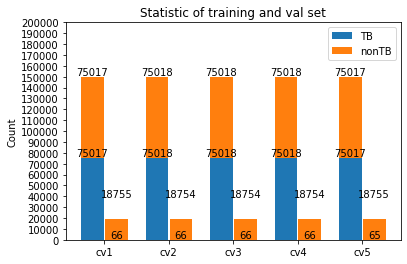

In [3]:
# read in csv and do k fold
df = pd.read_csv('/home/stevenlai/Desktop/chexnet_tensorflow/fullset/dataset/train.csv')
X = df[['path']]
Y = df[['label']]
skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True) 
trTB = []
trnTB = []
valTB = []
valnTB = []


for x,y in skf.split(X,Y):
    TB_index = []
    TB_count = 0
    non_TB_count = 0
    
    val_TB_count = 0
    val_non_TB_count = 0
    
    #print('train(~=92):',len(x))
    #print('val(~=24):',len(y))
    
    for i in x:
        if (Y.iloc[i,0]) == 1:
            TB_count += 1
            TB_index.append(i)
        else:
            non_TB_count += 1
    #print('TB:',TB_count)
    #trTB.append(TB_count)
    #print('non TB:',non_TB_count)
    #trnTB.append(non_TB_count)
    #print()
    
    # imbalance by simply adding up
    imbalance = non_TB_count - TB_count
    
    #print(non_TB_count,TB_count)
    for j in range(imbalance):
        i = j % len(TB_index)
        #print(Y.iloc[x[i]][0])
        x = np.append(x,TB_index[i])
            #print(len(x))
            #print(X.iloc[x[i]][0])
            
    TB_count = 0
    non_TB_count = 0           
    for i in x:
        if (Y.iloc[i,0]) == 1:
            TB_count += 1
        else:
            non_TB_count += 1
    #print('TB:',TB_count)
    trTB.append(TB_count)
    #print('non TB:',non_TB_count)
    trnTB.append(non_TB_count)
    #print()    
    
    
    for i in y:
        if (Y.iloc[i,0]) == 1:
            val_TB_count += 1
        else:
            val_non_TB_count += 1
    #print('TB:',TB_count)
    valTB.append(val_TB_count)
    #print('non TB:',non_TB_count)
    valnTB.append(val_non_TB_count)
    #print()
    
# bar plot
labels = ['cv1','cv2','cv3','cv4','cv5']
N = 5

ind = np.arange(N)  
width = 0.35       
x = np.arange(len(labels)) 
p1 = plt.bar(x - width/2 - 0.01, trTB, width ,label='TB')
p2 = plt.bar(x - width/2 - 0.01, trnTB, width, bottom = trTB,label='non TB')
p3 = plt.bar(x + width/2 + 0.01, valTB, width, color=p1[0].get_facecolor())
p4 = plt.bar(x + width/2 + 0.01, valnTB, width, bottom = valTB,label='non TB',
            color=p2[0].get_facecolor())

plt.ylabel('Count')
plt.title('Statistic of training and val set')
plt.xticks(ind,labels)
plt.yticks(np.arange(0, 200001, 10000))
plt.legend()
plt.legend((p1[0], p2[0]), ('TB', 'nonTB'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.*height,
                '%d' % int(height),
                ha='center', va='bottom')
def autolabel2(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2.0*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(p1)
autolabel2(p2)
autolabel(p3)
autolabel2(p4)

plt.show()

In [4]:
# file:///home/stevenlai/Downloads/28288-31036-1-PB.pdf
# http://europepmc.org/article/PMC/4335146
def CLAHE(img):
    img = img[:,:,0]
    img = img / 255
    #p2, p98 = np.percentile(img, (2, 98))
    #img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
    #img_adapteq = np.expand_dims(img_adapteq,axis=2)
    rgb_batch = np.repeat(img_adapteq[..., np.newaxis], 3, -1)
    return rgb_batch

train_datagen = ImageDataGenerator(zoom_range = 0.1,
                                   preprocessing_function=CLAHE)
image_dir = '/home/stevenlai/Desktop/chexnet/database/'

In [ ]:
with tf.device('/device:CPU:0'):
    # read in csv and do k fold
    df = pd.read_csv('/home/stevenlai/Desktop/chexnet_tensorflow/fullset/dataset/train.csv')
    X = df[['path']]
    Y = df[['label']]
    skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True) 
    trTB = []
    trnTB = []
    valTB = []
    valnTB = []

    best_fold = 0
    best_acc = 0

    c = 1
    for x,y in skf.split(X,Y):
        TB_index = []
        TB_count = 0
        non_TB_count = 0

        val_TB_count = 0
        val_non_TB_count = 0

        #print('train(~=92):',len(x))
        #print('val(~=24):',len(y))

        for i in x:
            if (Y.iloc[i,0]) == 1:
                TB_count += 1
                TB_index.append(i)
            else:
                non_TB_count += 1
        #print('TB:',TB_count)
        #trTB.append(TB_count)
        #print('non TB:',non_TB_count)
        #trnTB.append(non_TB_count)
        #print()

        # imbalance by simply adding up
        imbalance = non_TB_count - TB_count

        #print(non_TB_count,TB_count)
        for j in range(imbalance):
            i = j % len(TB_index)
            #print(Y.iloc[x[i]][0])
            x = np.append(x,TB_index[i])
                #print(len(x))
                #print(X.iloc[x[i]][0])

        TB_count = 0
        non_TB_count = 0           
        for i in x:
            if (Y.iloc[i,0]) == 1:
                TB_count += 1
            else:
                non_TB_count += 1
        #print('TB:',TB_count)
        trTB.append(TB_count)
        #print('non TB:',non_TB_count)
        trnTB.append(non_TB_count)
        #print()    


        for i in y:
            if (Y.iloc[i,0]) == 1:
                val_TB_count += 1
            else:
                val_non_TB_count += 1
        #print('TB:',TB_count)
        valTB.append(val_TB_count)
        #print('non TB:',non_TB_count)
        valnTB.append(val_non_TB_count)
        #print()


        df['label'] = df['label'].astype(str)
        training_data = df.iloc[x]
        validation_data = df.iloc[y]

        train_data_generator = train_datagen.flow_from_dataframe(training_data, 
                                                                 directory = image_dir,
                                                                 x_col = "path", 
                                                                 y_col = "label",
                                                                 class_mode = "binary" ,
                                                                 shuffle = True,
                                                                 #color_mode = 'grayscale',
                                                                 target_size = (224,224),
                                                                 batch_size = 32,
                                                                 seed = 10)
        val_data_generator = train_datagen.flow_from_dataframe(validation_data,
                                                               directory = image_dir,
                                                               x_col = "path", 
                                                               y_col = "label",
                                                               class_mode = "binary" ,
                                                               shuffle = True,
                                                               #color_mode = 'grayscale',
                                                               target_size = (224,224),
                                                               batch_size = 32,
                                                               seed = 10) 


        base_model = tf.keras.applications.DenseNet121(input_shape=(224,224,3),include_top=False,weights='imagenet')
        base_model.trainable = True
        top_model = tf.keras.models.Sequential()
        top_model.add(tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:]))
        top_model.add(tf.keras.layers.Dropout(0.5))
        top_model.add(tf.keras.layers.Dense(500, kernel_initializer='normal',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
        top_model.add(tf.keras.layers.BatchNormalization())
        top_model.add(tf.keras.layers.Activation('relu'))
        top_model.add(tf.keras.layers.Dropout(0.5))
        top_model.add(tf.keras.layers.Dense(500, kernel_initializer='normal',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
        top_model.add(tf.keras.layers.BatchNormalization())
        top_model.add(tf.keras.layers.Activation('relu'))
        top_model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
        model = tf.keras.models.Model(base_model.inputs, top_model(base_model.output))
        #model.summary()

        model.compile(optimizer=tf.keras.optimizers.Adam(),
                      loss='binary_crossentropy',
                      metrics=['acc'])    


        reduce_lr = ReduceLROnPlateau(factor = 0.5,
                                      monitor = 'val_loss',
                                      min_lr = 0.000001,
                                      patience = 10,
                                      verbose = 1)
        filepath = os.path.join('/home/stevenlai/Desktop/chexnet_tensorflow/fullset/model',"DenseNet_Trainable_CLAHE_" + str(c) + ".hdf5")
        checkpoint = ModelCheckpoint(filepath,
                                     monitor='val_acc',
                                     verbose=1,
                                     save_best_only=True,
                                     save_weights_only=False,
                                     mode='auto')   

        #VGG16 preprocess
        train_step = np.floor(150034/32)
        val_step = np.floor(18821/32)
        model_history = model.fit(train_data_generator,
                                  steps_per_epoch=train_step,
                                  epochs=50,
                                  validation_data=val_data_generator,
                                  validation_steps=val_step,
                                  verbose=1,
                                  callbacks=[reduce_lr,checkpoint]
                                  )

        # Plot
        plt.title('loss')
        plt.plot(model_history.history['loss'],'bo', label=' loss (training data)')
        plt.plot(model_history.history['val_loss'], label=' loss (validation data)')
        plt.ylabel('Loss value')
        plt.xlabel('No. epoch')
        plt.legend(loc="upper right")
        plt.savefig('/home/stevenlai/Desktop/chexnet_tensorflow/fullset/plot/DenseNet_Trainable_CLAHE_loss_' + str(c) + '.jpg')
        plt.show()
        plt.close('all')

        plt.title('accuracy')
        plt.plot(model_history.history['acc'],'bo', label='accuracy (training data)')
        plt.plot(model_history.history['val_acc'], label='accuracy (validation data)')
        plt.ylabel('accuracy value')
        plt.xlabel('No. epoch')
        plt.legend(loc="lower right")
        plt.savefig('/home/stevenlai/Desktop/chexnet_tensorflow/fullset/plot/DenseNet_Trainable_CLAHE_acc_' + str(c) + '.jpg')
        plt.show()
        plt.close('all')

        if max(model_history.history['val_acc']) > best_acc:
            best_acc = max(model_history.history['val_acc'])
            best_fold = c
            print('best Acc:',best_acc)
            print('best fold:',best_fold)

        c+=1
        break


In [ ]:
#stop here

In [1]:
df = pd.read_csv('/home/stevenlai/Desktop/chexnet_tensorflow/fullset/dataset/test.csv')
df['label'] = df['label'].astype(str)
test_generator=train_datagen.flow_from_dataframe(
    dataframe=df, 
    directory=image_dir,
    x_col="path",
    y_col= "label",
    class_mode="binary",
    target_size=(224,224),
    batch_size=1,
    Seed = 501009,
    shuffle = False
)
test_generator.reset()

model_path = '/home/stevenlai/Desktop/chexnet_tensorflow/fullset/model/DenseNet_Trainable_CLAHE_' + str(best_fold) + '.hdf5'
model = tf.keras.models.load_model(model_path)
y_test=model.predict(test_generator,verbose=1)

y_label = np.array(df['label'].astype(float))
y_pred = np.concatenate(y_test)
fpr,tpr,_ =sklearn.metrics.roc_curve(y_label,y_pred)
roc_auc = auc(fpr,tpr) 
plt.figure()
lw = 3
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mon_Densenet_binary_prob_AUROC')
plt.legend(loc="lower right")
plt.savefig('/home/stevenlai/Desktop/chexnet_tensorflow/fullset/result/AUROC_' + str(best_fold)+'.jpg')
plt.show()

# Set threshold = 0.5 and evalute + xlsx + Matrix
y_pred_half = []
output_matrix = np.array([[0,0],[0,0]])
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred_half.append(1)
    else :y_pred_half.append(0)
        
# save filename
name = df['path']

# output csv
outputdir = open('/home/stevenlai/Desktop/chexnet_tensorflow/fullset/result/result_' + str(best_fold)+'.csv','w')
csvwriter = csv.writer(outputdir)
csvwriter.writerow(['file','ground truth','predict'])
for i in range(len(name)):
    csvwriter.writerow([name[i],y_label[i],y_pred_half[i]])
outputdir.close()

confusion_matrix = metrics.confusion_matrix(y_true=y_label, y_pred = y_pred_half)
confusion_matrix
output_matrix[0][0] = confusion_matrix[1][1]
output_matrix[0][1] = confusion_matrix[0][1]
output_matrix[1][0] = confusion_matrix[1][0]
output_matrix[1][1] = confusion_matrix[0][0]

fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(output_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(2):
    for j in range(2):
        ax.text(i, j, s = output_matrix.T[i, j], va='center', ha='center')
plt.title('TB-nonTB matrix')
plt.xlabel('ground truth')        
plt.ylabel('predict')
labels = ['TB','non-TB']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.savefig('/home/stevenlai/Desktop/chexnet_tensorflow/MON/result/Mon_Densenet_binary_prob_matrix_' + str(best_fold)+'.jpg')
plt.show()

print('Acc:',(output_matrix[0][0]+output_matrix[1][1])/sum(sum(output_matrix)))
recall = output_matrix[0][0]/(output_matrix[0][0]+output_matrix[1][0])
print('Recall:',recall)
precision = output_matrix[0][0]/(output_matrix[0][0]+output_matrix[0][1])
print('Precision:',precision)
print('F1 score:',2*recall*precision/(recall+precision))

NameError: name 'pd' is not defined